# Notebook for doing pirate stuff with Pandas Dataframes

In [38]:
# Install spacy and language model (uncomment if needed)
# !conda install -c conda-forge spacy -y
# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_md
# !conda install torchvision -y
# !conda install conda-forge::cupy -y

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 7.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [71]:
import os

# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

In [53]:
spacy.__version__

'3.7.2'

### Original Data that Mike found:

In [82]:
# Read clean csv
piracy_df_original = pd.read_csv('Data_Files/[Clean] IMO Piracy - 2000 to 2022 (PDV 01-2023).csv')

# Convert dates to datetime object
piracy_df_original['Incident Date'] = pd.to_datetime(piracy_df_original['Incident Date'], format='%m/%d/%Y')

# pd.concat([piracy_df_original.head(), piracy_df_original.tail()])
piracy_df_original

,Incident Date,Ship Name,Ship Flag,Ship Type,Area,Latitude,Longitude,Consequences to Crew,Part of Ship Raided,Ship Status,Weapons Used,Flag - Crew Injuries,Flag - Crew Held Hostage,Flag - Crew Missing,Flag - Crew Deaths,Flag - Crew Assaulted
0,2010-03-18,AL-ASA'A,Yemen,Dhow,In international waters,NaN,NaN,Ship Hijacked,Not Stated,Not Stated,None or Not Reported,False,True,False,False,False
1,2010-05-25,AL JAWAT,Yemen,Dhow,In international waters,NaN,NaN,Ship Hijacked,Not Stated,Steaming,None or Not Reported,False,False,False,False,False
2,2011-02-13,AL FARDOUS,Yemen,Fishing vessel,In territorial waters,NaN,NaN,Ship Hijacked,Not Stated,Steaming,None or Not Reported,False,False,False,False,False
3,2011-04-16,ABDI KHAN,Yemen,Fishing vessel,In international waters,11.900000,54.083333,Ship Hijacked,Not Stated,Steaming,None or Not Reported,False,True,False,False,False
4,2012-01-14,AL WASIL,Yemen,Dhow,In international waters,NaN,NaN,Ship Hijacked,Not Stated,Steaming,None or Not Reported,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,2009-12-30,GULF ELAN,Bahamas,Chemical tanker,In port area,22.690000,113.696667,No Consequences or Not Stated,Engine Room,At Anchor,None or Not Reported,False,False,False,False,False
4810,2008-11-07,CEC FUTURE,Bahamas,General cargo ship,In international waters,12.766667,45.933333,Ship Hijacked,Engine Room,Steaming,None or Not Reported,False,True,False,False,False
4811,2006-02-13,ASPEN ARROW,Bahamas,General cargo ship,In port area,NaN,NaN,No Consequences or Not Stated,Engine Room,At Anchor,None or Not Reported,False,False,False,False,False
4812,2009-10-24,ELLEN S,Antigua and Barbuda,Container ship,In territorial waters,20.641667,106.880000,Not Reported,Engine Room,At Anchor,None or Not Reported,False,False,False,False,False


In [31]:
# Go forth and do great things

### New data straight from the International Maritime Organization:
Note: This data is uncleaned and is dirtier than the decks of the Flying Dutchman.

In [77]:
# Read dirty csv
piracy_df_imo = pd.read_csv('Data_Files/[Dirty]_ListOfIncidents_IMO.csv')

# Convert Date column to DateTime Objects
piracy_df_imo['Date'] = pd.to_datetime(piracy_df_imo['Date'], format='%m/%d/%y')

# Show whatever you want
# pd.concat([piracy_df_imo.head(), piracy_df_imo.tail()])
piracy_df_imo

,Date,Ship Name,Ship Type,IMO No.,Area,Boarded?,Latitude,Longitude,Incident details,Consequences for crew etc,Action taken by master/crew,Reported?,Reported to...,Reporting State,Coastal State Action Taken,MSC/Circ
0,1994-07-22,PAVELS STERNBERGS,Reefer,7362366,In territorial waters,NaN,NaN,NaN,Ship boarded by seven men armed with big cable...,Deck watchman was slightly wounded and some sh...,Chief officer and other crew members came to t...,True,Incident reported to Port Authorities,Latvia,NaN,719
1,1994-09-09,BONSELLA,NaN,NaN,In territorial waters,NaN,NaN,NaN,Twenty-six bandits posing as Coast Guard hijac...,Ship's cargo and money stolen,-,True,Yes,United States,-,698
2,1994-10-23,SIBOELF,Ore/Bulk/oil carrier,9011935,In port area,NaN,NaN,NaN,"6-7 pirates wearing masks, armed with pistols ...",Personal belongings and cash stolen from crew,The watchman saw the pirates and informed term...,True,Terminal informed,Norway,Unknown,708
3,1994-10-26,TROPICAL SUN,NaN,NaN,In port area,NaN,NaN,NaN,Ship attacked with mortar shells which fell ab...,NaN,-,True,Yes,United States,-,698
4,1994-11-17,ANOMIS,NaN,7233711,In territorial waters,NaN,NaN,NaN,Boat opened fire on ship after trying unsucces...,-,-,True,Yes,United States,-,698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8551,2024-01-09,CMB Chikako,Bulk carrier,9701190,In territorial waters,NaN,1° 03.00' N,103° 39.59' E,"Five robbers armed with a knife, boarded a shi...",The robbers took hostage and tied up one of th...,Alarm raised and crew mustered,True,VTIS Singapore,NaN,Monitored vessel contact via VHF radio from ti...,333
8552,2024-01-12,Solar Roma,Product tanker,9887372,In port area,NaN,1° 43.29' N,101° 25.72' E,Duty security patrol onboard an anchored tanke...,Nil,Alarm raised,True,Dumai port control,NaN,NaN,333
8553,2024-01-14,Name Withheld,Oil tanker,NaN,In port area,NaN,21° 50.84' N,91° 41.84' E,D/O onboard an anchored tanker noticed a small...,Nil,"Alarm raised, and crew mustered",True,Port control and Coast Guard,NaN,NaN,333
8554,2024-01-14,Name Withheld,Supply ship,NaN,In port area,NaN,6° 05.00' S,12° 15.00' E,"Unnoticed, thieves boarded an anchored offshor...",Ship’s properties stolen,Nil,True,NaN,NaN,NaN,333


In [33]:
# Go forth and make Steve Urkel proud
piracy_df_imo.isna().sum()

Date                              0
Ship Name                       147
Ship Type                       350
IMO No.                        1343
Area                              6
Boarded?                       8556
Latitude                       4019
Longitude                      3981
Incident details                  5
Consequences for crew etc       488
Action taken by master/crew     385
Reported?                         0
Reported to...                 1851
Reporting State                7695
Coastal State Action Taken     1018
MSC/Circ                          0
dtype: int64

#### Find keywords in incident details using Spacy
Reference: https://towardsdatascience.com/structured-natural-language-processing-with-pandas-and-spacy-7089e66d2b10

In [73]:
# Generate 500 random rows for training data for our categorization
# DON'T OVERWRITE OUR TRAINING DATA

# piracy_df_imo.sample(n=500).to_csv('./Data_Files/training_data.csv')

In [34]:
def extract_tokens_plus_meta(doc:spacy.tokens.doc.Doc):
    """Extract tokens and metadata from individual spaCy doc."""
    return [(i.text, i.i, i.lemma_, i.ent_type_, i.tag_,
            i.dep_, i.pos_, i.is_stop, i.is_alpha,
            i.is_digit, i.is_punct) for i in doc]

In [35]:
def tidy_tokens(docs):
    """Extract tokens and metadata from list of spaCy docs.
    :returns Pandas dataframe with data"""

    cols = ["doc_id", "token", "token_order", "lemma",
            "ent_type", "tag", "dep", "pos", "is_stop",
            "is_alpha", "is_digit", "is_punct"]

    meta_df = []
    for ix, doc in enumerate(docs):
        meta = extract_tokens_plus_meta(doc)
        meta = pd.DataFrame(meta)
        meta.columns = cols[1:]
        meta = meta.assign(doc_id = ix).loc[:, cols]
        meta_df.append(meta)

    return pd.concat(meta_df)

In [39]:
# Load language model, disable 'named entity recognition'
nlp = spacy.load('en_core_web_md', disable=['ner'])

In [54]:
# Get column without NaNs and only named IMO incidents (IMO No.)
msk = piracy_df_imo['Incident details'].notna() & piracy_df_imo['IMO No.'].notna()
details_column = piracy_df_imo[msk].loc[:,'Incident details']

# Assign IMO No. as context/metadeta for each doc
# spacy.Doc.set_extension('IMO No.', default=None)

# Create doc objects
docs = list(nlp.pipe(details_column))
tokens_df = tidy_tokens(docs)
tokens_df

,doc_id,token,token_order,lemma,ent_type,tag,dep,pos,is_stop,is_alpha,is_digit,is_punct
0,0,Ship,0,ship,,NN,nsubj,NOUN,False,True,False,False
1,0,boarded,1,board,,VBN,ROOT,VERB,False,True,False,False
2,0,by,2,by,,IN,agent,ADP,True,True,False,False
3,0,seven,3,seven,CARDINAL,CD,nummod,NUM,False,True,False,False
4,0,men,4,man,,NNS,pobj,NOUN,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
43,7208,to,43,to,,IN,prep,ADP,True,True,False,False
44,7208,the,44,the,,DT,det,DET,True,True,False,False
45,7208,port,45,port,,NN,compound,NOUN,False,True,False,False
46,7208,authorities,46,authority,,NNS,pobj,NOUN,False,True,False,False


In [59]:
spacy.displacy.render(docs[0], style='ent')

In [68]:
piracy_df_imo.iloc[2,:]['Incident details']

'6-7 pirates wearing masks, armed with pistols and knives entered the cargo control room and ordered the 2nd Officer to take them to the Captain. Under threat the Captain opened the safe and the pirates took the cash and personal belongings from officers a'

Ideas:
- Build categories (cats) and assign them to each noun chunk
    - Categories: highjacked, boarded, hostages, theft, ship missing, crew member abducted/kidnapped, ship fired upon, casualties
- Set extension as interesting with keywords in lemma column
- Add IMO No. to doc metadata (context): Can't find a way to efficiently do this
- Set date as index

In [55]:
doc1 = nlp(piracy_df_imo.at[1,'Incident details'])
spacy.displacy.render(doc1)

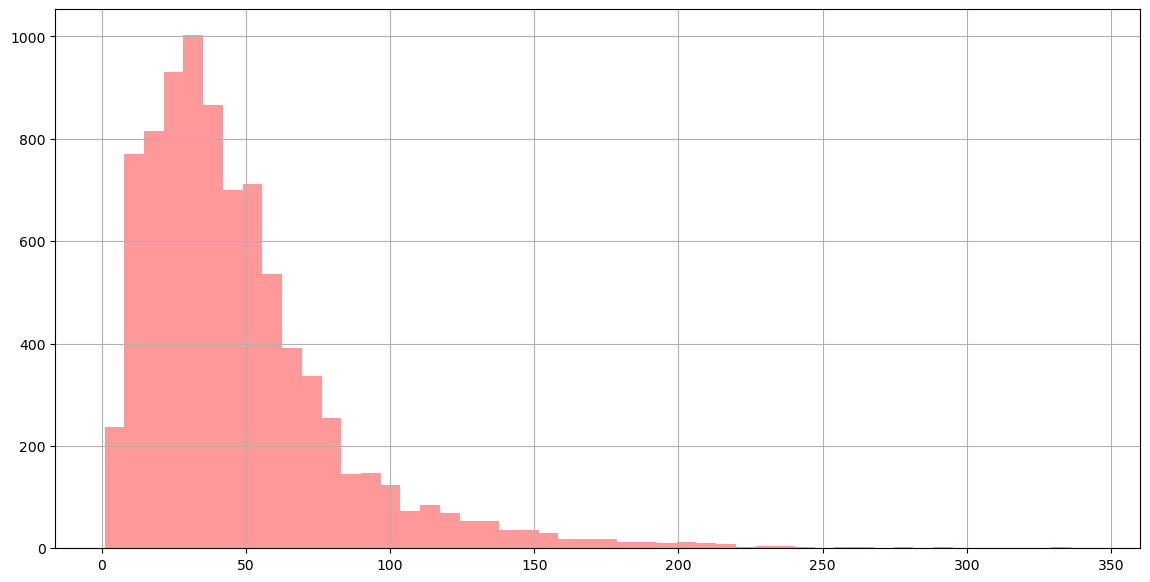

In [41]:
# View number of words per details string
tokens_df.groupby("doc_id").size().hist(figsize=(14, 7), color="red", alpha=.4, bins=50);

In [42]:
# View common token entities
tokens_df.query("ent_type != ''").ent_type.value_counts()

ent_type
CARDINAL       10660
ORG             7899
GPE             2615
TIME            1729
QUANTITY        1427
DATE             836
PERSON           764
NORP             735
LOC              400
ORDINAL          293
FAC              244
PRODUCT          214
LAW               52
MONEY             43
WORK_OF_ART       40
LANGUAGE          10
EVENT              8
PERCENT            2
Name: count, dtype: int64

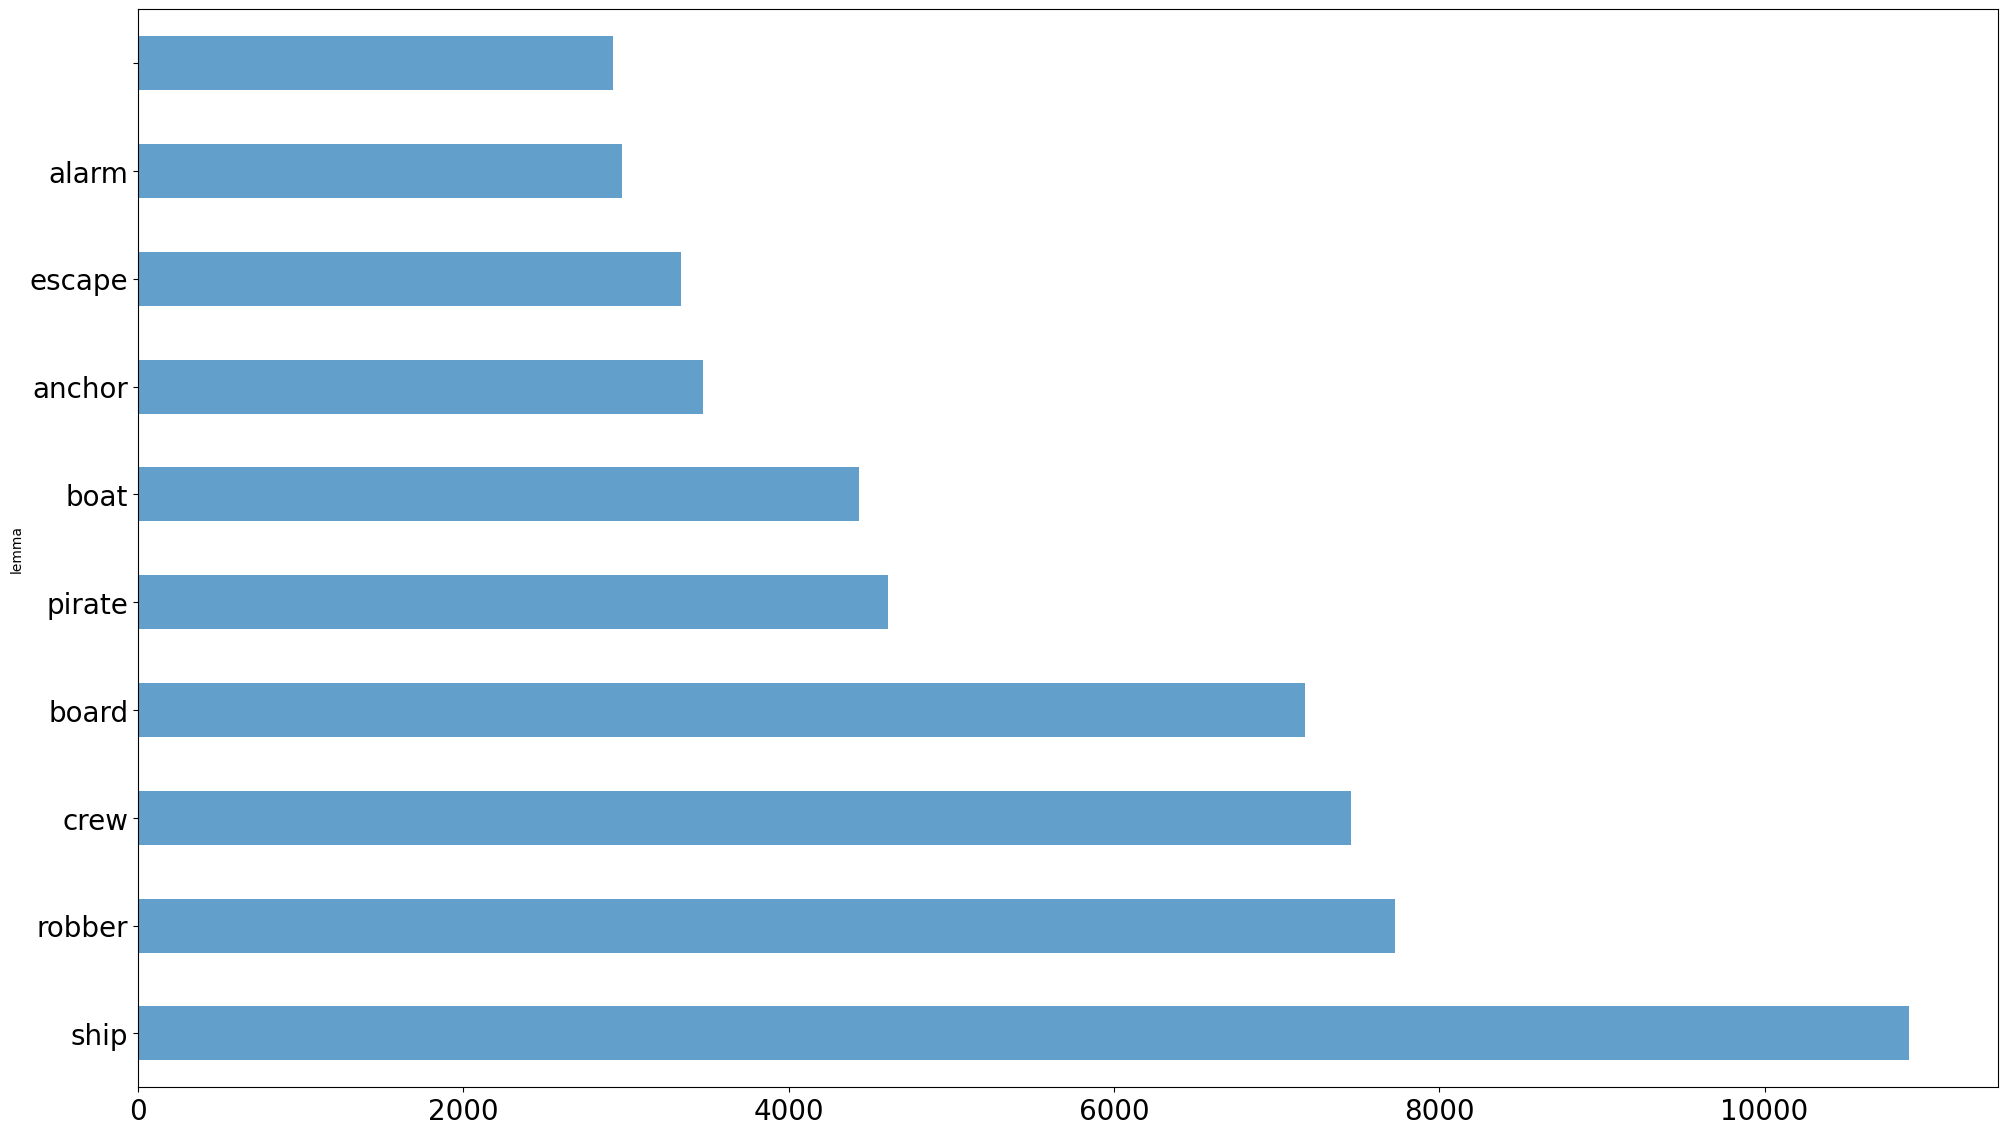

In [43]:
# View most common stop words
tokens_df.query("is_stop == False & is_punct == False").lemma.value_counts().head(10).plot(kind="barh", figsize=(24, 14), alpha=.7)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20);

In [ ]:
(tokens_df.groupby("doc_id").apply(lambda x: x.assign(
    prev_token = lambda x: x.token.shift(1),
    next_token = lambda x: x.token.shift(-1)))
 .reset_index(drop=True)
 .query("is_stop == True")
 .loc[:, ["doc_id", "prev_token", "token", "next_token"]]
 )

#### Find keywords in incident details column of ListOfIncidents_IMO.csv (the hard way)

In [ ]:
import operator
import csv
import string

In [ ]:
word_dict = dict()  # Holds all the words and their number of occurrences

# Open file
f = open('Data_Files/[Dirty] IMO Piracy - 2000 to 2022 (PDV 01-2023).csv', 'r', newline='')
f.readline()  # skip the first line, we know it's a header
reader = csv.reader(f, delimiter=',')

# Iterate through each line in the file
for line in reader:
    # Strip and split the line by spaces
    details = line[8].strip().split(' ')

    # Iterate through the words in the details
    for word in details:
        # Strip whitespace, make lowercase, and remove punctuation
        word = word.strip().lower()
        word = word.translate(str.maketrans('', '', string.punctuation))

        # Add each word to the dictionary and increment their occurrences
        if word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] += 1

# Sort dictionary by occurrences
sorted_dict = sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)

# Print result
print('Sorted dictionary:')
for key, value in sorted_dict:
    print(f'{key:<15}: {value}')